In [3]:
from fastai.vision.all import * # immporting the vision componants of FastAI

In [5]:
path = untar_data(URLs.MNIST) # download and add the data to the path

In [7]:
Path.BASE_PATH = path #define our path as the BASE PATH

In [8]:
(path/"training").ls() #checking our dataset's structure

(#10) [Path('training/1'),Path('training/3'),Path('training/9'),Path('training/0'),Path('training/2'),Path('training/7'),Path('training/4'),Path('training/8'),Path('training/5'),Path('training/6')]

In [11]:
block=DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2,seed=42),
get_y=parent_label,
batch_tfms=aug_transforms(mult=2.,do_flip=False))

#creation of the DataBlock, 
#here we're defining how to access files 
#how to split the data to create a training and validation data
#how to get labels
#and the transformation that we're doing on our data (to avoid overfitting)

In [13]:
loaders=block.dataloaders(path/"training") #here we're creating a loader to load the data in our model

/home/jules/miniconda3/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [14]:
learn=cnn_learner(loaders, resnet18, pretrained=False,metrics=accuracy)
#here we're defining our learner, I will use an untrained (without weights, only layers of neurons)resnet 18 

SuggestedLRs(valley=0.0006918309954926372)

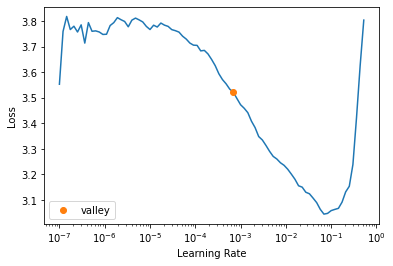

In [15]:
learn.lr_find() #pretraining the beggining of our model to find the right learning rate

In [16]:
learn.fit_one_cycle(12, 6e-3) #change the second value (lr) based on the number that you got using lr_find

epoch,train_loss,valid_loss,accuracy,time
0,0.401777,0.152752,0.955333,00:23
1,0.321743,0.231240,0.940250,00:23
2,0.207719,0.116820,0.967583,00:22
3,0.173420,0.092863,0.973083,00:22
4,0.115510,0.051636,0.987167,00:22
5,0.102679,0.058895,0.983083,00:22
6,0.079733,0.049735,0.985167,00:22
7,0.071158,0.032919,0.990667,00:22
8,0.051153,0.024100,0.993167,00:22
9,0.038354,0.021350,0.994250,00:26


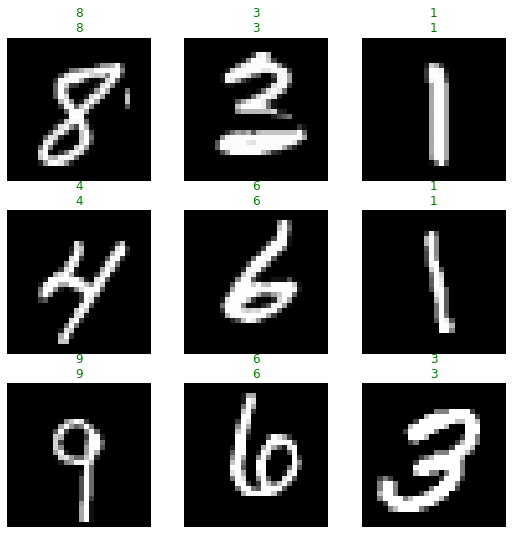

In [25]:
learn.show_results() #let's take a lok at the results 

In [30]:
learn.export() #use this to export the modified model